In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/engage-2-value-from-clicks-to-conversions/sample_submission.csv
/kaggle/input/engage-2-value-from-clicks-to-conversions/train_data.csv
/kaggle/input/engage-2-value-from-clicks-to-conversions/test_data.csv
/kaggle/input/submission-csv/submission.csv


In [2]:
#import pandas as pd
#df = pd.read_csv("/kaggle/input/engage-2-value-from-clicks-to-conversions/train_data.csv") 
#X = df.drop("purchaseValue", axis=1) 
#y = df['purchaseValue'] 
#from sklearn.dummy import DummyRegressor 
#model = DummyRegressor().fit(X,y) 
#X_test = pd.read_csv("/kaggle/input/engage-2-value-from-clicks-to-conversions/test_data.csv") 
#y_pred=model.predict(X_test) 

In [3]:
#submission = pd.DataFrame({"id": range(0,X_test.shape[0]), "purchaseValue": y_pred}) 
#submission.to_csv('submission.csv',index=False)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
train_df = pd.read_csv('/kaggle/input/engage-2-value-from-clicks-to-conversions/train_data.csv')
test_df = pd.read_csv('/kaggle/input/engage-2-value-from-clicks-to-conversions/test_data.csv')

In [5]:
train_df.columns

Index(['trafficSource.isTrueDirect', 'purchaseValue', 'browser',
       'device.screenResolution', 'trafficSource.adContent',
       'trafficSource.keyword', 'screenSize', 'geoCluster',
       'trafficSource.adwordsClickInfo.slot', 'device.mobileDeviceBranding',
       'device.mobileInputSelector', 'userId', 'trafficSource.campaign',
       'device.mobileDeviceMarketingName', 'geoNetwork.networkDomain',
       'gclIdPresent', 'device.operatingSystemVersion', 'sessionNumber',
       'device.flashVersion', 'geoNetwork.region', 'trafficSource',
       'totals.visits', 'geoNetwork.networkLocation', 'sessionId', 'os',
       'geoNetwork.subContinent', 'trafficSource.medium',
       'trafficSource.adwordsClickInfo.isVideoAd', 'browserMajor',
       'locationCountry', 'device.browserSize',
       'trafficSource.adwordsClickInfo.adNetworkType', 'socialEngagementType',
       'geoNetwork.city', 'trafficSource.adwordsClickInfo.page',
       'geoNetwork.metro', 'pageViews', 'locationZone',
      

In [6]:
test_df.columns

Index(['userChannel', 'date', 'browser', 'device.browserSize',
       'device.browserVersion', 'deviceType', 'device.flashVersion',
       'device.isMobile', 'device.language', 'device.mobileDeviceBranding',
       'device.mobileDeviceMarketingName', 'device.mobileDeviceModel',
       'device.mobileInputSelector', 'os', 'device.operatingSystemVersion',
       'device.screenColors', 'device.screenResolution', 'geoNetwork.city',
       'geoNetwork.continent', 'locationCountry', 'geoNetwork.metro',
       'geoNetwork.networkDomain', 'geoNetwork.networkLocation',
       'geoNetwork.region', 'geoNetwork.subContinent', 'socialEngagementType',
       'totals.bounces', 'totalHits', 'new_visits', 'pageViews',
       'totals.visits', 'trafficSource.adContent',
       'trafficSource.adwordsClickInfo.adNetworkType',
       'trafficSource.adwordsClickInfo.isVideoAd',
       'trafficSource.adwordsClickInfo.page',
       'trafficSource.adwordsClickInfo.slot', 'trafficSource.campaign',
       'traffic

In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29006 entries, 0 to 29005
Data columns (total 51 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   userChannel                                   29006 non-null  object 
 1   date                                          29006 non-null  int64  
 2   browser                                       29006 non-null  object 
 3   device.browserSize                            29006 non-null  object 
 4   device.browserVersion                         29006 non-null  object 
 5   deviceType                                    29006 non-null  object 
 6   device.flashVersion                           29006 non-null  object 
 7   device.isMobile                               29006 non-null  bool   
 8   device.language                               29006 non-null  object 
 9   device.mobileDeviceBranding                   29006 non-null 

In [8]:
train_df.describe()

,purchaseValue,userId,gclIdPresent,sessionNumber,totals.visits,sessionId,trafficSource.adwordsClickInfo.page,pageViews,locationZone,totals.bounces,date,totalHits,sessionStart,new_visits
count,1.160230e+05,116023.000000,116023.000000,116023.000000,116023.0,1.160230e+05,4281.000000,116015.000000,116023.0,47148.0,1.160230e+05,116023.000000,1.160230e+05,80518.0
mean,2.656393e+07,61094.356231,0.037019,2.691311,1.0,1.493429e+09,1.019622,8.412352,8.0,1.0,2.016860e+07,10.607371,1.493429e+09,1.0
std,2.051825e+08,35240.756859,0.188808,10.451613,0.0,1.528798e+07,0.174517,14.344937,0.0,0.0,6.182322e+03,19.629576,1.528798e+07,0.0
min,0.000000e+00,0.000000,0.000000,1.000000,1.0,1.470035e+09,1.000000,1.000000,8.0,1.0,2.016080e+07,1.000000,1.470035e+09,1.0
25%,0.000000e+00,30603.500000,0.000000,1.000000,1.0,1.480066e+09,1.000000,1.000000,8.0,1.0,2.016112e+07,1.000000,1.480066e+09,1.0
50%,0.000000e+00,61014.000000,0.000000,1.000000,1.0,1.491646e+09,1.000000,2.000000,8.0,1.0,2.017041e+07,2.000000,1.491646e+09,1.0
75%,0.000000e+00,91616.500000,0.000000,2.000000,1.0,1.505079e+09,1.000000,10.000000,8.0,1.0,2.017091e+07,12.000000,1.505079e+09,1.0
max,2.312950e+10,122276.000000,1.000000,447.000000,1.0,1.525157e+09,5.000000,469.000000,8.0,1.0,2.018043e+07,500.000000,1.525157e+09,1.0


In [9]:
test_df.describe()

,date,totals.bounces,totalHits,new_visits,pageViews,totals.visits,trafficSource.adwordsClickInfo.page,sessionId,sessionNumber,sessionStart,userId,locationZone,gclIdPresent
count,2.900600e+04,11732.0,29006.000000,20094.0,29003.000000,29006.0,1107.000000,2.900600e+04,29006.000000,2.900600e+04,29006.000000,29006.0,29006.000000
mean,2.016855e+07,1.0,10.659519,1.0,8.470813,1.0,1.015357,1.493320e+09,2.595980,1.493320e+09,61327.854134,8.0,0.038268
std,6.200443e+03,0.0,19.771218,0.0,14.561705,0.0,0.177227,1.532493e+07,9.333323,1.532493e+07,35253.344987,0.0,0.191846
min,2.016080e+07,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.470035e+09,1.000000,1.470035e+09,8.000000,8.0,0.000000
25%,2.016112e+07,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.479931e+09,1.000000,1.479931e+09,31006.500000,8.0,0.000000
50%,2.017041e+07,1.0,2.000000,1.0,2.000000,1.0,1.000000,1.491492e+09,1.000000,1.491492e+09,61430.500000,8.0,0.000000
75%,2.017091e+07,1.0,12.000000,1.0,10.000000,1.0,1.000000,1.505148e+09,2.000000,1.505148e+09,91866.250000,8.0,0.000000
max,2.018043e+07,1.0,500.000000,1.0,466.000000,1.0,5.000000,1.525152e+09,334.000000,1.525152e+09,122268.000000,8.0,1.000000


User & Session Metadata 
| Column          | Description                                          |
| --------------- | ---------------------------------------------------- |
| `userId`        | Unique ID for the user                               |
| `sessionId`     | Unique ID for a session (group of user interactions) |
| `sessionNumber` | The nth session for the user                         |
| `sessionStart`  | Timestamp (or similar) marking session start         |


* Missing Values
* Explore Numerical data
* Explore Categorical data
* Find the relationship between variables
  

In [10]:
train_df.isnull().sum()

trafficSource.isTrueDirect                       73133
purchaseValue                                        0
browser                                              0
device.screenResolution                              0
trafficSource.adContent                         113060
trafficSource.keyword                            71861
screenSize                                           0
geoCluster                                           0
trafficSource.adwordsClickInfo.slot             111742
device.mobileDeviceBranding                          0
device.mobileInputSelector                           0
userId                                               0
trafficSource.campaign                               0
device.mobileDeviceMarketingName                     0
geoNetwork.networkDomain                             0
gclIdPresent                                         0
device.operatingSystemVersion                        0
sessionNumber                                        0
device.fla

In [11]:
train_df.shape


(116023, 52)

In [12]:
[features for features in train_df.columns if train_df[features].isnull().sum()>0]

['trafficSource.isTrueDirect',
 'trafficSource.adContent',
 'trafficSource.keyword',
 'trafficSource.adwordsClickInfo.slot',
 'trafficSource.adwordsClickInfo.isVideoAd',
 'trafficSource.adwordsClickInfo.adNetworkType',
 'trafficSource.adwordsClickInfo.page',
 'pageViews',
 'trafficSource.referralPath',
 'totals.bounces',
 'new_visits']

In [13]:
missing_counts = train_df.isnull().sum()
missing_counts = missing_counts[missing_counts > 0].sort_values(ascending=False)
print(missing_counts)


trafficSource.adContent                         113060
trafficSource.adwordsClickInfo.isVideoAd        111742
trafficSource.adwordsClickInfo.slot             111742
trafficSource.adwordsClickInfo.adNetworkType    111742
trafficSource.adwordsClickInfo.page             111742
trafficSource.referralPath                       73309
trafficSource.isTrueDirect                       73133
trafficSource.keyword                            71861
totals.bounces                                   68875
new_visits                                       35505
pageViews                                            8
dtype: int64


In [14]:
# List of sparse columns to drop
sparse_cols_to_drop = [
    'trafficSource.adContent',
    'trafficSource.adwordsClickInfo.slot',
    'trafficSource.adwordsClickInfo.isVideoAd',
    'trafficSource.adwordsClickInfo.adNetworkType',
    'trafficSource.adwordsClickInfo.page'
]

# Drop from train set
train_df.drop(columns=sparse_cols_to_drop, inplace=True)

# If you have test_df as well, drop from it too
test_df.drop(columns=sparse_cols_to_drop, inplace=True)


In [15]:
train_df['trafficSource.keyword'] = train_df['trafficSource.keyword'].fillna('unknown')
train_df['trafficSource.isTrueDirect'] = train_df['trafficSource.isTrueDirect'].fillna('unknown')
train_df['trafficSource.referralPath'] = train_df['trafficSource.referralPath'].fillna('unknown')

In [16]:
train_df['totals.bounces'].fillna(0)
train_df['new_visits'].fillna(0)


0         1.0
1         1.0
2         0.0
3         1.0
4         1.0
         ... 
116018    1.0
116019    1.0
116020    0.0
116021    1.0
116022    0.0
Name: new_visits, Length: 116023, dtype: float64

In [17]:
train_df['pageViews'].fillna(train_df['pageViews'].median())


0          1.0
1          1.0
2          6.0
3          1.0
4         54.0
          ... 
116018    26.0
116019     1.0
116020     1.0
116021     2.0
116022    73.0
Name: pageViews, Length: 116023, dtype: float64

<Axes: >

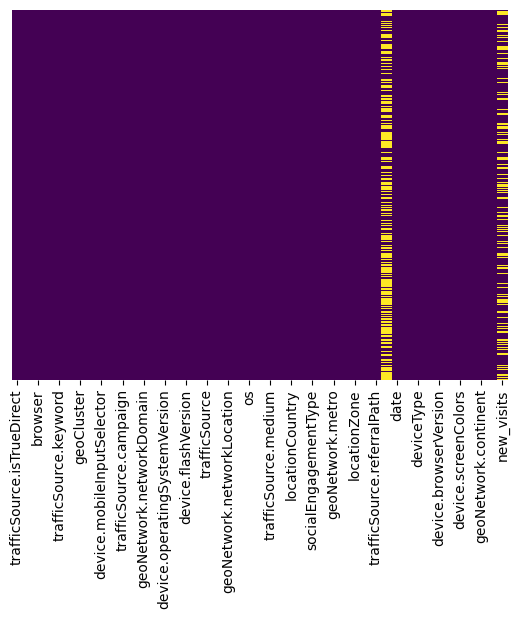

In [18]:
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [19]:
train_df.isnull().sum()

trafficSource.isTrueDirect              0
purchaseValue                           0
browser                                 0
device.screenResolution                 0
trafficSource.keyword                   0
screenSize                              0
geoCluster                              0
device.mobileDeviceBranding             0
device.mobileInputSelector              0
userId                                  0
trafficSource.campaign                  0
device.mobileDeviceMarketingName        0
geoNetwork.networkDomain                0
gclIdPresent                            0
device.operatingSystemVersion           0
sessionNumber                           0
device.flashVersion                     0
geoNetwork.region                       0
trafficSource                           0
totals.visits                           0
geoNetwork.networkLocation              0
sessionId                               0
os                                      0
geoNetwork.subContinent           

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error




In [21]:
def engineer_features(df, source_df=None):
    df = df.copy()

    if 'sessionStart' in df.columns:
        if df['sessionStart'].dtype != 'datetime64[ns]':
            df['sessionStart'] = pd.to_datetime(df['sessionStart'], unit='s', errors='coerce')

        df = df.sort_values(by=['userId', 'sessionStart'])

        df['hour'] = df['sessionStart'].dt.hour
        df['minute'] = df['sessionStart'].dt.minute
        df['second'] = df['sessionStart'].dt.second
        df['year'] = df['sessionStart'].dt.year
        df['month'] = df['sessionStart'].dt.month
        df['day'] = df['sessionStart'].dt.date
        df['weekday'] = df['sessionStart'].dt.day_name()
        df['week'] = df['sessionStart'].dt.isocalendar().week

        if source_df is None:
            df['prevSession'] = df.groupby('userId')['sessionStart'].shift(1)
        else:
            last_sessions = source_df.groupby('userId')['sessionStart'].max().rename('prevSession')
            df = df.merge(last_sessions, on='userId', how='left')

        df['timeBetween'] = (df['sessionStart'] - df['prevSession']).dt.total_seconds() / 3600
        df['timeBetween_days'] = df['timeBetween'] / 24

    if 'sessionId' in df.columns:
        df['sessions_per_hour'] = df['hour'].map(df.groupby('hour')['sessionId'].nunique())
        df['sessions_per_day'] = df['day'].map(df.groupby('day')['sessionId'].nunique())
        df['sessions_per_week'] = df['week'].map(df.groupby('week')['sessionId'].nunique())
        df['sessions_by_hour_of_day'] = df['hour'].map(df['hour'].value_counts().sort_index())
        df['sessions_by_day_of_week'] = df['weekday'].map(df['weekday'].value_counts())

    if 'sessionNumber' in df.columns and source_df is None:
        session_counts = df.groupby('userId')['sessionNumber'].max()
        retention_counts = session_counts.value_counts().sort_index()
        retention_cumsum = retention_counts[::-1].cumsum()[::-1]
        returning_rate = (retention_cumsum.shift(-1) / retention_cumsum).fillna(0)
        drop_off_rate = 1 - returning_rate
        df['returning_rate_by_session_number'] = df['sessionNumber'].map(returning_rate)
        df['drop_off_rate_by_session_number'] = df['sessionNumber'].map(drop_off_rate)

    if 'pageViews' in df.columns and 'totalHits' in df.columns:
        df['pageviews_per_hit'] = df['pageViews'] / (df['totalHits'] + 1)

    df.drop(columns=['sessionStart', 'prevSession'], inplace=True, errors='ignore')

    return df

In [22]:

def build_model_pipeline(train_df, test_df, target_col='purchaseValue', id_cols=['userId', 'sessionId'], regressor=None):
    categorical_cols = train_df.select_dtypes(include=['object', 'bool']).columns.difference(id_cols).tolist()
    numerical_cols = train_df.select_dtypes(include=['int64', 'float64']).columns.difference(id_cols + [target_col]).tolist()
    feature_cols = numerical_cols + categorical_cols

    for col in categorical_cols:
        train_df[col] = train_df[col].astype(str)
        test_df[col] = test_df[col].astype(str)

    y = np.log1p(train_df[target_col])
    X = train_df[feature_cols]
    X_test = test_df[feature_cols]

    numeric_transformer = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ])

    categorical_transformer = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ])

    preprocessor = ColumnTransformer([
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

    if regressor is None:
        from sklearn.linear_model import LinearRegression
        regressor = LinearRegression()

    model = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', regressor)
    ])

    return model, X, y, X_test

In [23]:
def train_and_evaluate_xgboost(train_df, test_df, target_col='purchaseValue'):
    train_fe = engineer_features(train_df)
    test_fe = engineer_features(test_df)
    
    regressor = XGBRegressor(random_state=42, use_label_encoder=False, eval_metric='rmse')

    param_grid = {
        'regressor__max_depth': [3, 5],
        'regressor__learning_rate': [0.1],
        'regressor__n_estimators': [100],
        'regressor__subsample': [0.8],
        'regressor__colsample_bytree': [0.8]
    }

    model, X, y, X_test = build_model_pipeline(train_fe, test_fe, target_col, regressor=regressor)

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    grid_search = GridSearchCV(model, param_grid, cv=3, scoring='r2', n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)
    print("Best params:", grid_search.best_params_)

    best_model = grid_search.best_estimator_
    preprocessor = best_model.named_steps['preprocessor']
    regressor = best_model.named_steps['regressor']

    X_train_transformed = preprocessor.transform(X_train)
    X_val_transformed = preprocessor.transform(X_val)

    regressor.fit(
        X_train_transformed, y_train,
        eval_set=[(X_val_transformed, y_val)],
        early_stopping_rounds=10,
        verbose=True
    )

    y_val_pred_log = regressor.predict(X_val_transformed)
    y_val_pred_raw = np.expm1(y_val_pred_log)
    y_val_raw = np.expm1(y_val)

    print("Validation R\u00b2 (log):", r2_score(y_val, y_val_pred_log))
    print("Validation R\u00b2 (raw):", r2_score(y_val_raw, y_val_pred_raw))
    print("Validation RMSE (raw):", mean_squared_error(y_val_raw, y_val_pred_raw, squared=False))

    X_test_transformed = preprocessor.transform(X_test)
    y_pred_test_log = regressor.predict(X_test_transformed)
    y_pred_test = np.expm1(y_pred_test_log)

    submission = pd.DataFrame({
        "id": range(len(test_df)),
        "purchaseValue": y_pred_test
    })
    submission.to_csv("submission.csv", index=False)
    print("Submission saved to submission.csv")

In [24]:
def compare_distributions(train_df, test_df, cols):
    for col in cols:
        plt.figure(figsize=(6, 3))
        sns.kdeplot(train_df[col].dropna(), label='Train', shade=True)
        sns.kdeplot(test_df[col].dropna(), label='Test', shade=True)
        plt.title(f'Distribution: {col}')
        plt.legend()
        plt.tight_layout()
        plt.show()

In [25]:
# from sklearn.metrics import r2_score, mean_squared_error
# import pandas as pd
# import numpy as np

# def evaluate_predictions(
#     submission_path,
#     train_df,
#     target_col='purchaseValue',
#     id_col='index',
#     prediction_col='purchaseValue',
#     log_transform=False,
#     metric='r2'
# ):
#     """
#     Evaluate submission predictions against true target values.

#     Args:
#         submission_path (str): Path to submission CSV with 'id' and predicted values.
#         train_df (pd.DataFrame): Training dataframe with actual values.
#         target_col (str): Name of the true target column in train_df.
#         id_col (str): Column to merge on (default is 'index').
#         prediction_col (str): Column in submission CSV containing predictions.
#         log_transform (bool): Whether the original model was trained on log-transformed target.
#         metric (str): 'r2' or 'rmse'

#     Returns:
#         float: Metric score.
#     """

#     # Load submission
#     submission = pd.read_csv(submission_path)

#     # Ensure train_df has a merge key
#     if id_col not in train_df.columns:
#         train_df = train_df.reset_index()

#     # Merge predictions with true values
#     merged = train_df.merge(submission, left_on=id_col, right_on='id')
#     actual = merged[target_col + '_x']  # from train_df
#     predicted = merged[prediction_col + '_y'].clip(lower=0)  # from submission


#     if log_transform:
#         # If the model was trained on log1p-transformed target, apply same transform here
#         actual = np.log1p(actual)
#         predicted = np.log1p(predicted)

#     # Choose metric
#     if metric == 'r2':
#         score = r2_score(actual, predicted)
#     elif metric == 'rmse':
#         score = mean_squared_error(actual, predicted, squared=False)
#     else:
#         raise ValueError("Unsupported metric: use 'r2' or 'rmse'")

#     print(f"{metric.upper()} score: {score:.4f}")
#     return score




In [26]:
# Assuming train_df and test_df are already loaded in your notebook
train_and_evaluate_xgboost(train_df, test_df, target_col='purchaseValue')



Fitting 3 folds for each of 2 candidates, totalling 6 fits
Best params: {'regressor__colsample_bytree': 0.8, 'regressor__learning_rate': 0.1, 'regressor__max_depth': 5, 'regressor__n_estimators': 100, 'regressor__subsample': 0.8}


/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:6.72451
[1]	validation_0-rmse:6.21978
[2]	validation_0-rmse:5.77682
[3]	validation_0-rmse:5.39038
[4]	validation_0-rmse:5.05291
[5]	validation_0-rmse:4.76093
[6]	validation_0-rmse:4.50755
[7]	validation_0-rmse:4.28994
[8]	validation_0-rmse:4.10355
[9]	validation_0-rmse:3.94253
[10]	validation_0-rmse:3.80708
[11]	validation_0-rmse:3.71930
[12]	validation_0-rmse:3.61472
[13]	validation_0-rmse:3.55141
[14]	validation_0-rmse:3.49999
[15]	validation_0-rmse:3.42836
[16]	validation_0-rmse:3.36952
[17]	validation_0-rmse:3.31992
[18]	validation_0-rmse:3.27581
[19]	validation_0-rmse:3.24067
[20]	validation_0-rmse:3.21123
[21]	validation_0-rmse:3.18484
[22]	validation_0-rmse:3.16337
[23]	validation_0-rmse:3.14482
[24]	validation_0-rmse:3.12913
[25]	validation_0-rmse:3.11449
[26]	validation_0-rmse:3.10172
[27]	validation_0-rmse:3.09547
[28]	validation_0-rmse:3.09014
[29]	validation_0-rmse:3.07874
[30]	validation_0-rmse:3.07021
[31]	validation_0-rmse:3.06217
[32]	validation_0-

In [27]:
# # Example 1: R² on raw purchase values
# evaluate_predictions('submission.csv', train_df, log_transform=False, metric='r2')

# # Example 2: RMSE on log-transformed values
# evaluate_predictions('submission.csv', train_df, log_transform=True, metric='rmse')


In [28]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116023 entries, 0 to 116022
Data columns (total 47 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   trafficSource.isTrueDirect        116023 non-null  object 
 1   purchaseValue                     116023 non-null  float64
 2   browser                           116023 non-null  object 
 3   device.screenResolution           116023 non-null  object 
 4   trafficSource.keyword             116023 non-null  object 
 5   screenSize                        116023 non-null  object 
 6   geoCluster                        116023 non-null  object 
 7   device.mobileDeviceBranding       116023 non-null  object 
 8   device.mobileInputSelector        116023 non-null  object 
 9   userId                            116023 non-null  int64  
 10  trafficSource.campaign            116023 non-null  object 
 11  device.mobileDeviceMarketingName  116023 non-null  o